# Cálculo del controlador vía LQR

In [11]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
from numpy.linalg import eig
m=1;Fricc=0.1; long=0.6;g=9.8;M=1.5;
##%Versión linealizada en el equilibrio inestable. Sontag Pp 104.
##%            estado=[p(i); p_p(i); fi(i); omega(i)]
##Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 Fricc/(long*M) g*(m+M)/(long*M) 0];
##Mat_B=[0; 1/M; 0; -1/(long*M)];1
##Mat_C=[1 0 0 0]; %La salida es posición
Mat_A=np.array([[0. ,1. ,0. ,0.],[0.,-Fricc/M, -m*g/M,0.],[0., 0. ,0. ,1.],[0.,-Fricc/(long*M) ,-g*(m+M)/(long*M), 0.]])
Mat_B=np.array([[0.],[1/M],[0.],[-1./(long*M)]])
Mat_C=np.array([[1., 0., 0., 0.],[0., 0., 1., 0.]])

## Cálculo del controlador vía LQR

In [12]:
##Cálculo LQR
##% Construcción del sistema ampliado
##Mat_Aa=[Mat_A zeros(4,1);-Mat_C 0];
Mat_Aaa=np.block([[Mat_A,np.array([[0],[0],[0],[0]])]])
Mat_Aa=np.block([[Mat_Aaa],[-Mat_C[0,:],np.array([0])]])
##Mat_Aa=[[[Mat_A, [[0],[0],[0],[0]]]],[-Mat_C,[0]]] #Puede ser tambien
##Mat_Ba=[Mat_B;0];
Mat_Ba=np.block([[Mat_B],[0]])
# Q=np.diag([1, 1, 100, 1000, .01]);R=np.diag([1e2]);
Q=np.diag([1e2, 1e2, 1e5, 1e5, 1]); R=np.diag([3e3]); #
##%Construcción del Hamiltoniano para el cálculo del controlador
##H=[Mat_A -Mat_B*inv(R)*Mat_B'; -Q -Mat_A'];
Mat_Har=np.block([[Mat_Aa, -np.matmul(Mat_Ba, np.matmul(np.linalg.inv(R),np.transpose(Mat_Ba)))]])
Mat_Hab=np.block([[-Q, -np.transpose(Mat_Aa)]])
Mat_H=np.block([[Mat_Har],[Mat_Hab]])
D,V=eig(Mat_H)
MX1X2=np.zeros((10, 5), dtype=complex)
jj=0;
for ii in range(10):
    if np.real(D[ii])<0:
        MX1X2[:,jj]=V[:,ii]
        jj=jj+1
MX1=MX1X2[:-5,:]
MX2=MX1X2[5:,:]
P=np.real(np.matmul(MX2,np.linalg.inv(MX1)))
# Ka=np.matmul(np.matmul(np.linalg.inv(R),np.transpose(Mat_Ba)),P)
Ka=np.linalg.inv(R)@np.transpose(Mat_Ba)@P
##K=Ka[0:-1] #np.array([  -5.1934e+00 , -8.6724e+00,  -6.2847e+01 , -1.9927e+01])
KI =-Ka[0][-1] # -6.7959e-01;
auto_val_LCq,auto_vect_LC=eig(Mat_Aa-Mat_Ba@Ka)
print("Polos de lazo cerrado de LQR de polos del controlador en ", auto_val_LCq)
# Polos de lazo cerrado de asignación de polos del controlador en [-20.68665+0.j       -0.04927+0.09396j  -0.04927-0.09396j
#   -0.81299+0.83486j  -0.81299-0.83486j]

Polos de lazo cerrado de LQR de polos del controlador en  [-3.2644965 +4.16027568j -3.2644965 -4.16027568j -0.10036602+0.j
 -0.29557681+0.27911815j -0.29557681-0.27911815j]


## Cálculo del Observador vía control óptimo

Calculamos el DUAL donde B_DUAL tiene dos columnas.

In [13]:
Mat_A_O=np.transpose(Mat_A)
Mat_B_O=np.transpose(Mat_C) #Acá C tiene dos filas

$R_{DUAL}$ tiene 4 componentes, es de 2x2.

In [14]:
Qdual=np.diag([1e0, 1e2, 1e1, 1e5]);
Rdual=np.diag([1, 1]) #mide ángulo y desplazamiento
##%Construcción del Hamiltoniano para el cálculo del controlador
##H=[Mat_A -Mat_B*inv(R)*Mat_B'; -Q -Mat_A'];
Mat_Har=np.block([[Mat_A_O, -np.matmul(Mat_B_O, np.matmul(np.linalg.inv(Rdual),np.transpose(Mat_B_O)))]])
Mat_Hab=np.block([[-Qdual, -np.transpose(Mat_A_O)]])
Mat_H=np.block([[Mat_Har],[Mat_Hab]])
D,V=eig(Mat_H)
MX1X2=np.zeros((8, 4), dtype=complex)
jj=0;
for ii in range(8):
    if np.real(D[ii])<0:
        MX1X2[:,jj]=V[:,ii]
        jj=jj+1
MX1=MX1X2[:-4,:]
MX2=MX1X2[4:,:]
P=np.real(np.matmul(MX2,np.linalg.inv(MX1)))
ko=np.matmul(np.matmul(np.linalg.inv(Rdual),np.transpose(Mat_B_O)),P)
Ko=np.transpose(ko)
print("Polos de lazo cerrado de LQR de polos del controlador en ", auto_val_LCq)
print('Polos del Observador:')
auto_val_LCO,auto_vect_LCO=eig(Mat_A-Ko@Mat_C)
auto_val_LCO
# mui=np.array([-20.68665,-0.04927 +  0.09396j,-0.04927 -  0.09396j,-0.81299 +  0.83486j,-0.81299 -  0.83486j])
# mui_o=np.array([-11.155498 + 29.555177j,-11.155498 - 29.555177j,-0.050094 +  0.025678j,-0.050094 -  0.025678j])

Polos de lazo cerrado de LQR de polos del controlador en  [-3.2644965 +4.16027568j -3.2644965 -4.16027568j -0.10036602+0.j
 -0.29557681+0.27911815j -0.29557681-0.27911815j]
Polos del Observador:


array([ -2.49484098 +2.38962514j,  -2.49484098 -2.38962514j,
       -12.14698246+13.03008465j, -12.14698246-13.03008465j])

## Condiciones iniciales y simulación

In [15]:
h=1e-3;t_simul=150.;
fi=np.linspace(0,0,int(t_simul/h))
##fi(1)=.1; color='r';
##fi(1)=.2; color='g';
##fi(1)=.7; color='b';
fi[0]=np.pi
# fi[0]=.8
fi_pp=0.;
#psi_p=np.array([0])
ref=10.
omega=np.linspace(0,0,int(t_simul/h))
p_p=np.linspace(0,0,int(t_simul/h))
u=np.linspace(0,0,int(t_simul/h))
p=np.linspace(0,0,int(t_simul/h))
psi=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))
y=np.linspace(0,0,int(t_simul/h))
y_o=np.linspace(0,0,int(t_simul/h))
p_O=np.linspace(0,0,int(t_simul/h))
fi_O=np.linspace(0,0,int(t_simul/h))

estado=np.array([[0],[0],[0],[0]])
x_hat=np.array([[0],[0],[0],[0]])
estado=np.array([[p[0]], [p_p[0]], [fi[0]], [omega[0]]])
for ii in range(int(t_simul/h-1)):
    Y = Mat_C@estado
    y[ii]=Y[0][0]
    psi_p = ref - y[ii] #Ref no nula sólo para el desplazamiento
    psi[ii+1]=psi[ii] + psi_p*h
    # u[ii]=-[Ka[0][:-1] @ estado - KI*psi[ii+1]][0][0] #Sin Observador
    u[ii]= -[Ka @ np.block([[x_hat],[psi[ii+1]]])][0][0][0]
##    p_pp=(1/(M+m))*(u(i)-m*long*tita_pp*cos(fi(i))+m*long*omega(i)^2*sin(fi(i))-Fricc*p_p(i));
    p_pp=(1/(M+m))*(u[ii]-m*long*fi_pp*cos(fi[ii])+(m*long*omega[ii]**2)*sin(fi[ii])-Fricc*p_p[ii]);
##    tita_pp=(1/long)*(g*sin(fi(i))-p_pp*cos(fi(i)));
    fi_pp=(1/long)*(g*sin(fi[ii])-p_pp*cos(fi[ii]));
#        %________OBSERVADOR__________
    Y_O=np.matmul(Mat_C,x_hat)
    y_o[ii]=Y_O[0][0]
    x_hatp = np.matmul(Mat_A,x_hat) + Mat_B*u[ii] + Ko@(Y-Y_O)
##    np.set_printoptions(precision=5)     print(x_hat)
    x_hat = x_hat + h*x_hatp;
    p_p[ii+1]  =p_p[ii]+h*p_pp;
    p[ii+1]    =p[ii]+h*p_p[ii];
    omega[ii+1]=omega[ii]+h*fi_pp;
    fi[ii+1]   =fi[ii]+h*omega[ii];
    t[ii] = ii*h
    estado[0]=p[ii+1]
    estado[1]=p_p[ii+1]
    estado[2]=fi[ii+1]
    estado[3]=omega[ii+1]
##      p_O(i+1)=x_hat(1);
    p_O[ii+1]=x_hat[0][0]
##    alfa_O(i+1)=x_hat(3);
    fi_O[ii+1]=x_hat[2][0]
t[ii+1] = ii*h
u[ii+1]=-[Ka @ np.block([[x_hat],[psi[ii]]])][0][0][0] #Sin Observador
x_hat

array([[-394242.25592005],
       [-407238.55839459],
       [ 140628.23346368],
       [-279022.66472685]])

# Figuras

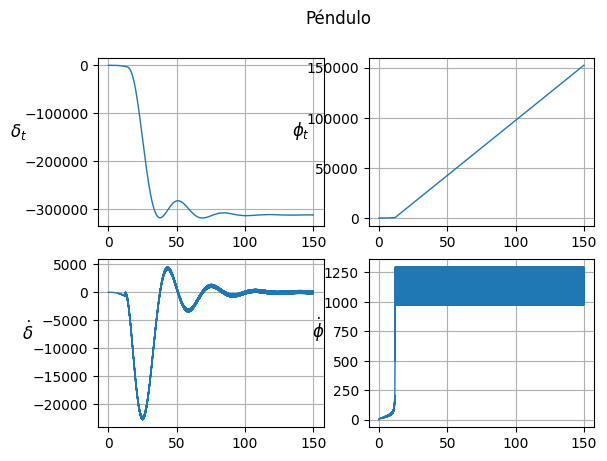

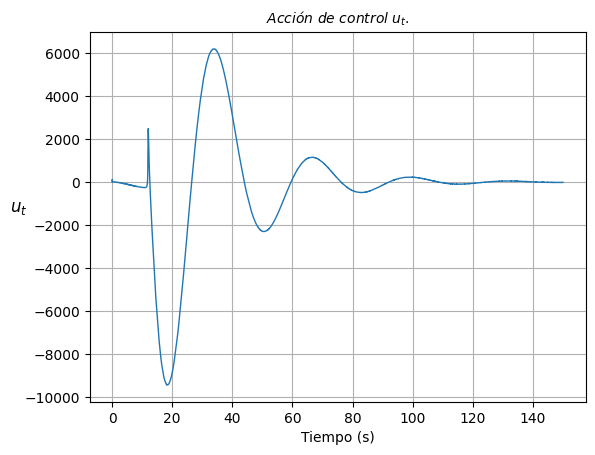

In [16]:

fig, axs = plt.subplots(2,2)
fig.suptitle('Péndulo')
axs[0,1].plot(t, fi, linewidth =1.0)
axs[0,1].grid( True )
axs[0,1].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, omega, linewidth =1.0)
axs[1,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

axs[0,0].plot(t, p, linewidth =1.0)
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,0].plot(t, p_p, linewidth =1.0)
axs[1,0].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,0].grid( True )
#Acción de control
fig, ax1 = plt.subplots()
plt.plot(t[:-1], u[:-1], linewidth =1.0)
plt.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
ax1.set_title('$Acción\ de\ control\ u_t.$', fontsize=10)
##
##fig2, axs2 = plt.subplots(1,2)
##fig2.suptitle('Péndulo')
##axs2[0].plot(t, fi-fi_O, linewidth =1.0)
##axs2[0].grid( True )
##axs2[0].set_ylabel('$Error\ \phi_t-\hat{\phi_t}$',rotation=0, fontsize=12)
##axs2[1].plot(t, p-p_O, linewidth =1.0)
##axs2[1].set_ylabel('$Error\ \delta_t\hat{\delta_t}$',rotation=0, fontsize=12)
##axs2[1].grid( True )
###Error de Observación
##fig, ax3 = plt.subplots()
##plt.plot(t, p-p_O, linewidth =1.0)
##plt.grid( True )
##ax3.set_title('$Error\ de\ observación\ \delta_t-\dot{\delta}.$', fontsize=10)
show()

In [7]:
import pandas as pd
df = pd.DataFrame({'t': t, 'fi': fi, 'fi_O':fi_O, 'fi_p': omega, 'p': p, 'p_O': p_O, 'p_p': p_p, 'u': u})

In [8]:
df.tail(3)

,t,fi,fi_O,fi_p,p,p_O,p_p,u
149997,149.997,146862.956607,145623.309429,1130.980931,19199.807706,16174.000487,-150.422008,-11.204594
149998,149.998,146864.087588,145624.398140,1283.341157,19199.657284,16173.985879,-244.030806,-11.200671
149999,149.998,146865.370930,145625.489732,987.535573,19199.413253,16173.964935,46.742839,-9.845842


In [9]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [10]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
  go.Scatter(x=df['t'], y=df['p'], mode='lines', name=r'$\delta_t$'),
  row=1,col=1
  )
fig.add_trace(
  go.Scatter(x=df['t'], y=df['p_O'], mode='lines', name=r'$\hat{\delta_t}$'),
  row=1, col=1
  )
fig.add_trace(
  go.Scatter(x=df['t'], y=df['fi'], mode='lines', name=r'$\phi_t$'),
  row=1, col=2
)
fig.add_trace(
  go.Scatter(x=df['t'], y=df['fi_O'], mode='lines', name=r'$\hat{\phi_t}$'),
  row=1, col=2
)
fig.update_layout(height=600, width=1000, title_text="Variables del péndulo invertido")
fig.show()

fig = make_subplots(rows=1, cols=1)
fig.add_trace(
  go.Scatter(x=df['t'], y=df['u'], mode='lines', name=r'Acción de control'),
  row=1,col=1
  )

Output hidden; open in https://colab.research.google.com to view.